In [2]:
### Load packages ###
import matplotlib.pyplot as plt
from scipy import stats
import nibabel as nib
import numpy as np
import os

### Aux. Functions ###
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")
    
def normalizeImg(x):
    # Normalize x
    max_val = np.max(x)
    min_val = np.min(x)
    norm_x = (x-min_val)/(max_val-min_val + 1e-7)
    return norm_x

def thresholdMask(mask, threshold=0.56):
    mask[mask >= threshold] = 1.0
    mask[mask < threshold] = 0.0
    return mask

%matplotlib inline





/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
### Load Data ###
# nii files
norm_img_nii = nib.load('../data/IXI551-Guys-1065-T1.nii') 
def_img_nii = nib.load('../data/IXI551-Guys-1065-T1_defaced.nii')
mask_img_nii = nib.load('../data/IXI551-Guys-1065-T1_mask.nii.gz')
# img data
norm_img = norm_img_nii.get_data()
def_img = def_img_nii.get_data()
mask_img = mask_img_nii.get_data()

### Data Size ###
print('Norm. Vol. :\n', norm_img.shape)
print()
print('Def. Vol. :\n', def_img.shape)
print()
print('Mask Vol. :\n', mask_img.shape)


Norm. Vol. :
 (256, 256, 150)

Def. Vol. :
 (256, 256, 150)

Mask Vol. :
 (256, 256, 150)


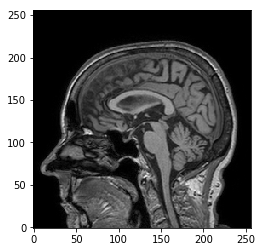

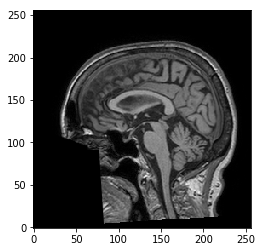

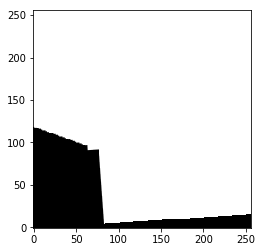

In [31]:
### Show corresponding slices ###
norm_slice = norm_img[:, :, 75]
def_slice = def_img[:, :, 75]
mask_slice = mask_img[:, :, 75]

show_slice(norm_slice)
plt.show()
show_slice(def_slice)
plt.show()
show_slice(mask_slice)
plt.show()

In [24]:
### Normalize & Pad Image ###
import os
import re
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from data_generator import DataGenerator

norm_img_norm = DataGenerator.normalizeImg(DataGenerator, norm_img)
norm_img_norm_pad = DataGenerator.padImage(DataGenerator, norm_img_norm)

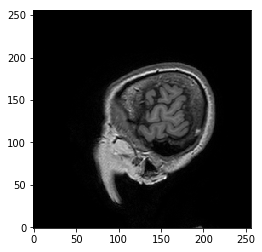

In [32]:
### View normalized and padded image ###
norm_slice = norm_img_norm_pad[:, :, 75]
#def_slice = def_img[:, :, 75]
#mask_slice = mask_img[:, :, 75]

show_slice(norm_slice)
plt.show()
#show_slice(def_slice)
#plt.show()
#show_slice(mask_slice)
#plt.show()

In [15]:
### Data Stats. ###
print('### Norm. Vol. :\n', stats.describe(norm_img, axis=None))
print()
print('### Def. Vol. :\n', stats.describe(def_img, axis=None))
print()
print('### Mask Vol. :\n',stats.describe(mask_img, axis=None))

### Norm. Vol. :
 DescribeResult(nobs=9830400, minmax=(0, 1068), mean=105.87923960367839, variance=27339.047981425392, skewness=1.3435070240881604, kurtosis=0.5705360358377836)

### Def. Vol. :
 DescribeResult(nobs=9830400, minmax=(0.0, 1068.0000607855618), mean=96.80267134371795, variance=25698.53975083795, skewness=1.4557747800552148, kurtosis=0.8811058960265847)

### Mask Vol. :
 DescribeResult(nobs=9830400, minmax=(0.0, 1.0), mean=0.8313851494809853, variance=0.13970232572609326, skewness=-1.7702029257462208, kurtosis=1.1384420878912769)
